> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: [Missing Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

## Main Question: 

## Does several factors such as age, type of patient(disabled), feed into the amount of missing appointments? 


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%pwd
%ls

Database_Ncis_and_Census_data/  Investigate_a_Dataset.html
Database_No_show_appointments/  Investigate_a_Dataset.ipynb
Database_TMDb_movie_data/


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df_appt = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")

### Reusable Function for the main types of wrangling. I will use this any time that I will check for info later down the line.


In [3]:
def MegaWrangle(df,shape,types,scribe,isNull,dupes):
   if shape == "Yes":
    print(" ")
    print("Shape")
    print(" ")
    print(df.shape)
   elif types == "Yes":
    print(" ")
    print("Types")
    print(" ")
    print(df.dtypes)
   elif scribe == "Yes":
    print(" ")
    print("Describe")
    print(" ")
    print(df.describe())
   elif isNull == "Yes":
    print(" ")
    print("Nulls")
    print(" ")
    print(df.isnull().sum())
   elif dupes == "Yes":
    print(" ")
    print("Dupes")
    print(" ")
    duplicateRows = df[df.duplicated()]
    print(duplicateRows)
MegaWrangle(df_appt,"Yes","No","No","No","No")
MegaWrangle(df_appt,"No","Yes","No","No","No")
MegaWrangle(df_appt,"No","No","Yes","No","No")
MegaWrangle(df_appt,"No","No","No","Yes","No")
MegaWrangle(df_appt,"No","No","No","No","Yes")

 
Shape
 
(110527, 14)
 
Types
 
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object
 
Describe
 
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+

## No Nulls Detected 

## No Dupes Detected



#### Lets take a look how the values in the columns are set up


In [4]:
for column in df_appt.columns:
    print(f"Counts in column '{column}':")
    print(df_appt[column].value_counts())
    print() 

Counts in column 'PatientId':
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64

Counts in column 'AppointmentID':
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: AppointmentID, Length: 110527, dtype: int64

Counts in column 'Gender':
F    71840
M    38687
Name: Gender, dtype: int64

Counts in column 'ScheduledDay':
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

Counts in column 'AppointmentD

### We can see that Handcap has 4 values. If I want to make any analysis on in later in this process, I will go ahead and make it a Yes or No or in this case, a 1 or a 0. I will do this step below

In [5]:
grouped_data = df_appt.groupby("Handcap")
appointment_count = grouped_data["No-show"].count()
print(appointment_count)

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: No-show, dtype: int64


In [6]:
df_appt.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


## Found error, checking for ages above 100 and below zero. Comment out due to erroring everytime, but is working as intended. Used this info to fix in next step


In [7]:
##assert df_appt['Age'].min() >= 0
##assert df_appt['Age'].min() <= 100


## Data Cleaning


### Found that some ages that were an issue. Some were above 110, and some were below 0. These will be removed as they may be outliers

In [8]:
#Counts amount of rows with ages below 0
neg = len(df_appt[df_appt['Age'] < 0])
print(neg)
#Counts age above 100
pos = len(df_appt[df_appt['Age'] >110])
print(pos)

df_appt['No-show'] = df_appt['No-show'] == "Yes"

# Group by handcap and count only True values in 'No-show'
true_counts = df_appt.groupby('Handcap')['No-show'].sum()
print(true_counts)

# Remove rows where 'Age' is below zero
df_appt = df_appt[df_appt['Age'] >= 0]

# Remove rows where 'Age' is above 110
df_appt = df_appt[df_appt['Age'] <= 110]


1
5
Handcap
0    21912
1      366
2       37
3        3
4        1
Name: No-show, dtype: int64


#### recount to ensure above step worked

In [18]:
#Counts amount of rows with ages below 0
neg = len(df_appt[df_appt['Age'] < 0])
print(neg)
#Counts age above 100
pos = len(df_appt[df_appt['Age'] >110])
print(pos)

0
0


#### Changes Handcap to 1 or 0

In [10]:
#Changes Handcap to either a 1 or a 0 based on handcap status. This will allow us to directly compare handcap vs not
df_appt['Handcap'] = df_appt['Handcap'].apply(lambda x: 1 if x in [1, 2, 3, 4] else x)
# Group by handcap and count only True values in 'No-show'
true_counts = df_appt.groupby('Handcap')['No-show'].sum()
print(true_counts)

Handcap
0    21912
1      404
Name: No-show, dtype: int64


### Data Drop for columns not needed

In [11]:
df_appt.drop(['PatientId','AppointmentID', 'ScheduledDay', 'Neighbourhood','Scholarship'], axis=1, inplace=True)

In [12]:
df_appt.head()

,Gender,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,1,0,0,0,0,False
1,M,2016-04-29T00:00:00Z,56,0,0,0,0,0,False
2,F,2016-04-29T00:00:00Z,62,0,0,0,0,0,False
3,F,2016-04-29T00:00:00Z,8,0,0,0,0,0,False
4,F,2016-04-29T00:00:00Z,56,1,1,0,0,0,False


<a id='eda'></a>
# Exploratory Data Analysis



#### Strategy I am looking at is to break the main question into bite sizes. This will allow for a detailed analysis for each. I will look to include two charts for each question / breakdown. 


## Main Question: Does several factors such as age, type of patient(disabled), feed into the amount of missing appointments?

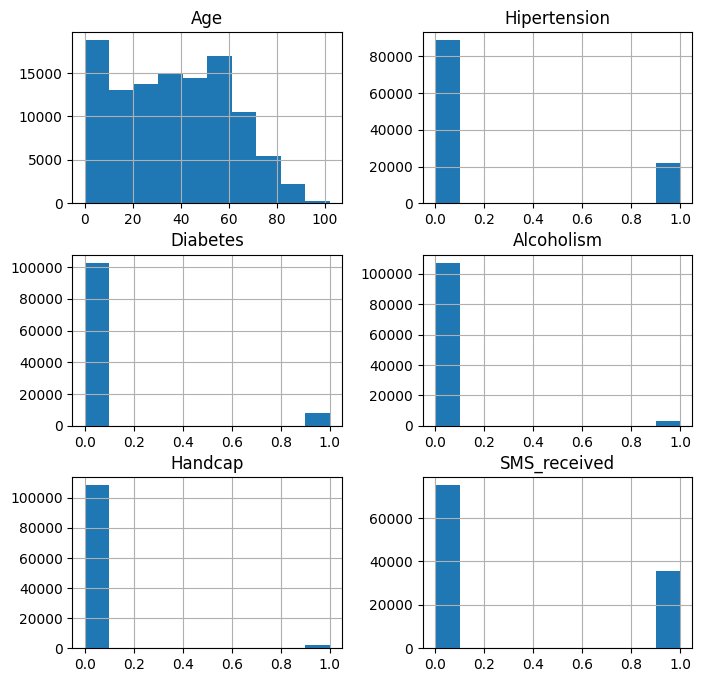

In [13]:
df_appt.hist(figsize=(8, 8));


### Breakdown One: Does Age factor into missed appointments, even with texts?

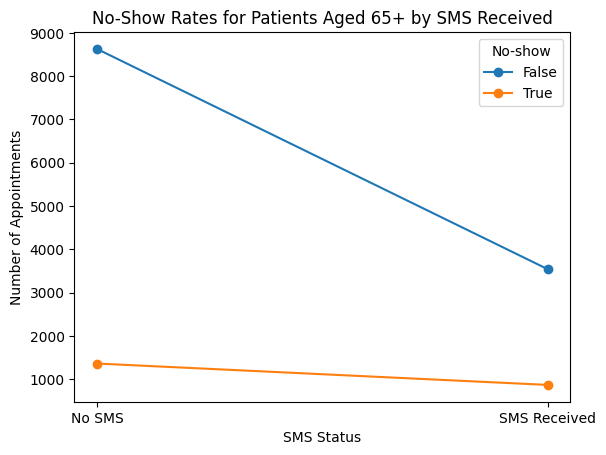

In [14]:
#Gets if age is greater then 65 to mark as elderly
df_elderly = df_appt[df_appt['Age'] >= 65]
# Grouping by 'SMS_received' and 'No-show', and counting appointments
grouped_data = df_elderly.groupby(['SMS_received', 'No-show']).size().unstack()
#Adds parameters for chart creation
grouped_data.plot(kind='line', marker='o')
plt.title('No-Show Rates for Patients Aged 65+ by SMS Received')
plt.xlabel('SMS Status')
plt.ylabel('Number of Appointments')
plt.xticks(ticks=[0, 1], labels=['No SMS', 'SMS Received'])
plt.show()

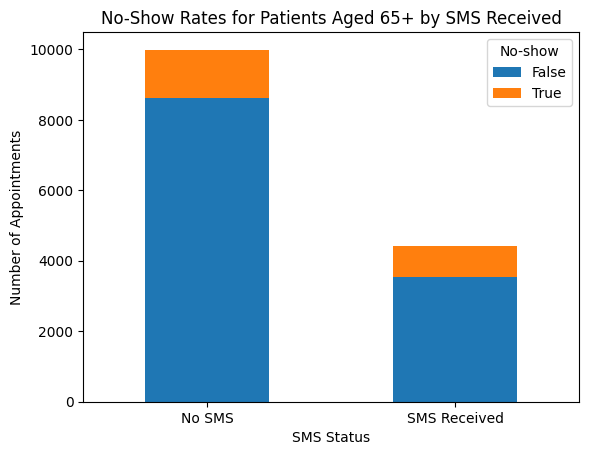

In [15]:
#Gets if age is greater then 65 to mark as elderly
df_elderly = df_appt[df_appt['Age'] >= 65]
# Grouping by 'SMS_received' and 'No-show', and counting appointments
grouped_data = df_elderly.groupby(['SMS_received', 'No-show']).size().unstack()
#Adds parameters for chart creation
grouped_data.plot(kind='bar', stacked=True)
plt.title('No-Show Rates for Patients Aged 65+ by SMS Received')
plt.xlabel('SMS Status')
plt.ylabel('Number of Appointments')
plt.xticks(ticks=[0, 1], labels=['No SMS', 'SMS Received'], rotation=0)
plt.show()

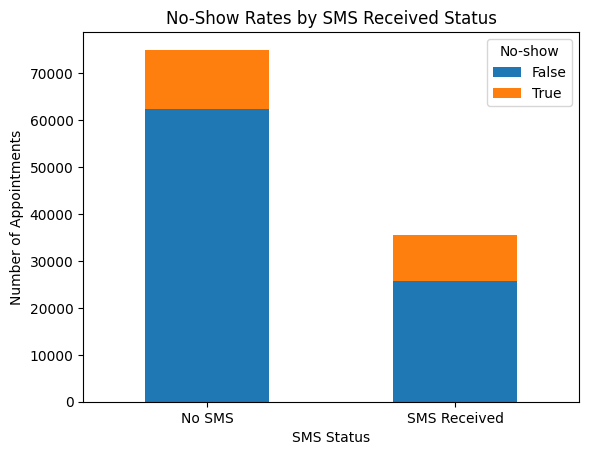

In [26]:
# Grouping by 'SMS_received' and 'No-show', and counting appointments for all ages
grouped_data_all_ages = df_appt.groupby(['SMS_received', 'No-show']).size().unstack()
#Adds parameters for chart creation
grouped_data_all_ages.plot(kind='bar', stacked=True)
plt.title('No-Show Rates by SMS Received Status')
plt.xlabel('SMS Status')
plt.ylabel('Number of Appointments')
plt.xticks(ticks=[0, 1], labels=['No SMS', 'SMS Received'], rotation=0)
plt.show()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: No-show, Length: 110521, dtype: bool

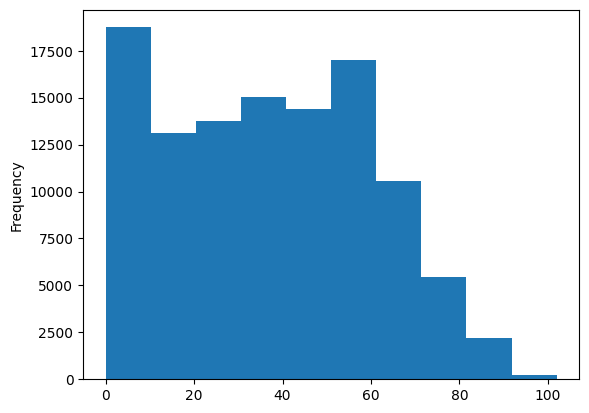

In [16]:
df_appt['Age'].plot(kind='hist');
df_appt.columns
df_appt['No-show']

### Breakdown Two: Does Alcholism affect attendence rate to appointment

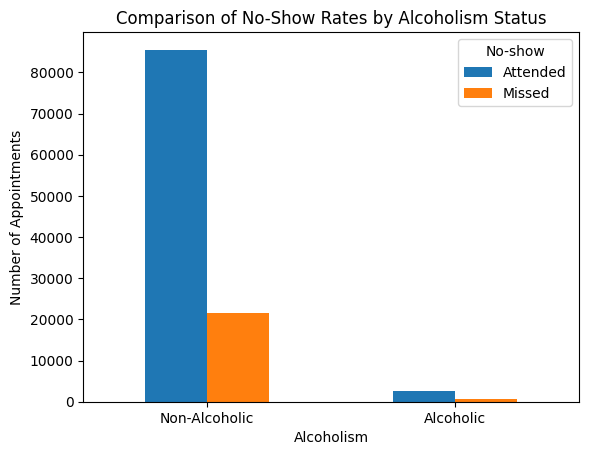

In [25]:

# Grouping by 'Alcoholism' and 'No-show', and counting appointments
grouped_data = df_appt.groupby(['Alcoholism', 'No-show']).size().unstack()

#Adds parameters for chart creation
grouped_data.plot(kind='bar')
plt.title('Comparison of No-Show Rates by Alcoholism Status')
plt.xlabel('Alcoholism')
plt.ylabel('Number of Appointments')
plt.xticks(ticks=[0, 1], labels=['Non-Alcoholic', 'Alcoholic'], rotation=0)
plt.legend(title='No-show', labels=['Attended', 'Missed'])
plt.show()

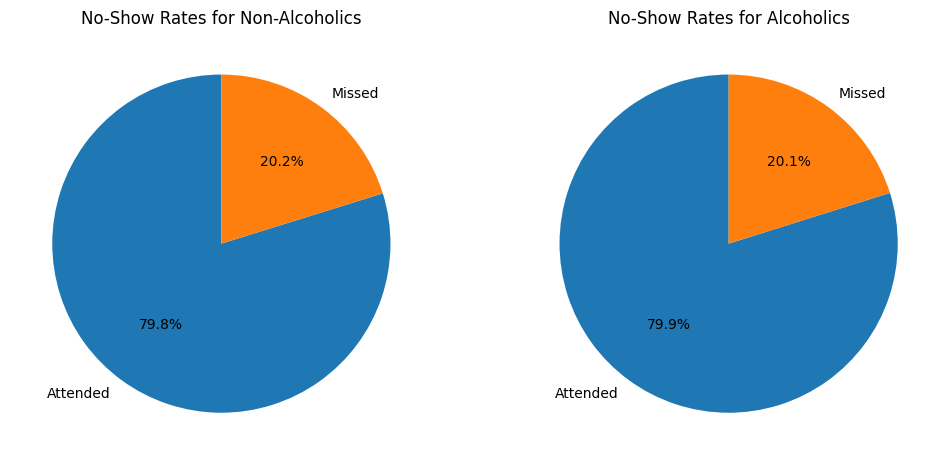

In [23]:
# Group by Alcoholism and calculate the no-show rate
grouped = df_appt.groupby('Alcoholism')['No-show'].value_counts(normalize=True).unstack()
# Plot pie charts for each group
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plots 2 pie charts comparing non Alcoholics and Alcoholics
grouped.loc[0].plot(kind='pie', ax=axes[0], autopct='%1.1f%%', labels=['Attended', 'Missed'], startangle=90)
axes[0].set_ylabel('')
axes[0].set_title('No-Show Rates for Non-Alcoholics')
grouped.loc[1].plot(kind='pie', ax=axes[1], autopct='%1.1f%%', labels=['Attended', 'Missed'], startangle=90)
axes[1].set_ylabel('')
axes[1].set_title('No-Show Rates for Alcoholics')
plt.show()

<a id='conclusions'></a>
## Conclusions

### The data types were in a good spot for the most part, so the wrangling stage was easier, the only main issue found was the No-Show data was set to an object. After changing this to a boolean, this was easy to use Pandas to count and compare to other data
### We may have found a trend with sms to patients and attendence rate of appointments. The line and bar chart show this well, as you can see the trend pretty easily, with a much better view on the bar chart. 
### It was important to find any extreme outliers in the age as these may have influenced the results. 
### When comparing the elderly vs the whole data set, we can see a trend on where elderly typically have a better chance of showing up for an appointment
### The data on Alcoholism was a bit less informative then my inital thought. I found no major trend or anyhting to follow. Unsure if this is due to lack of data or if this is a normal situation, as this condition may not have any influence on rates.


## Limitation
### I found that making charts for the Alcoholism was difficult due to the difference in data. We have so many appointments not marked vs not alot that are marked as Alcoholism. This made the pie chart very useful in this case. But in an optimal case in studying Alcoholism rates, It would be more beneficial to see a 50% breakdown of each population

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

##### Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb